In [11]:
from sklearn import datasets

In [12]:
diabetes = datasets.load_diabetes()

In [13]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

## Feature Names

In [14]:
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


## Create X and Y data matrices

In [15]:
X = diabetes.data 
Y = diabetes.target

In [16]:
X.shape, Y.shape

((442, 10), (442,))

## Implementation of linear_regression model

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [19]:
X_train.shape, Y_train.shape

((353, 10), (353,))

In [21]:
X_test.shape, Y_test.shape

((89, 10), (89,))

In [3]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

### Define the Regression Model

In [4]:
lr = linear_model.LinearRegression()

### Build training model

In [22]:
lr.fit(X_train, Y_train)

LinearRegression()

In [23]:
Y_pred = lr.predict(X_test)

## Prediction Results 

### Print model performances

In [24]:
print('Coefficients:', lr.coef_)
print('Intercept:', lr.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred))

Coefficients: [  19.27045802 -205.73832806  573.88095725  336.15394249 -825.57731093
  527.65158048  131.25384508  142.80483641  740.4849469    30.82557436]
Intercept: 152.7939666424234
Mean squared error (MSE): 2944.82
Coefficient of determination (R^2): 0.46


## String formatting

By default r2_score returns a floating number 

In [25]:
r2_score(Y_test, Y_pred)

0.45776371608641975

In [26]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [27]:
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df["target"] = diabetes.target  # Add target variable

# Splitting features and target
X = df.drop(columns=["target"]) 
y = df["target"]

In [28]:
# Convert X to DataFrame to avoid 'numpy.ndarray' error
X = pd.DataFrame(X, columns=df.drop(columns=["target"]).columns)

# Outlier Detection & Removal (Fixed to Work with DataFrame)
def remove_outliers(df, method="zscore", threshold=3):
    df_copy = df.copy()  # Ensure no changes to original dataset
    
    if method == "zscore":
        z_scores = np.abs(zscore(df_copy))
        return df_copy[(z_scores < threshold).all(axis=1)]  # Keep only data within threshold
    
    elif method == "iqr":
        Q1 = df_copy.quantile(0.25)  # First quartile
        Q3 = df_copy.quantile(0.75)  # Third quartile
        IQR = Q3 - Q1  # Interquartile range
        return df_copy[~((df_copy < (Q1 - 1.5 * IQR)) | (df_copy > (Q3 + 1.5 * IQR))).any(axis=1)]  # Remove outliers
    
    else:
        raise ValueError("Invalid method. Use 'zscore' or 'iqr'.")

# Apply Outlier Removal (Choose 'zscore' or 'iqr' method)
X_cleaned = remove_outliers(X, method="iqr")  # Try "zscore" as well
y_cleaned = y.loc[X_cleaned.index]  # Keep only corresponding target values

# Feature Scaling using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cleaned)

# Convert back to DataFrame after scaling to avoid NumPy issues
X_scaled = pd.DataFrame(X_scaled, columns=X_cleaned.columns)

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cleaned, test_size=0.2, random_state=42)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate R² score
r2 = r2_score(y_test, y_pred)
print(f"Improved Linear Regression R² Score: {r2:.4f}")

Improved Linear Regression R² Score: 0.5186


In [29]:
import seaborn as sns 

In [30]:
Y_test

array([ 51., 275.,  86.,  83., 310.,  59., 219., 113., 200., 183., 132.,
        74., 217., 198., 246., 123.,  47., 109.,  71., 259., 109.,  51.,
        59.,  94., 263., 235.,  71.,  70., 216., 232., 118.,  48.,  68.,
        63.,  90., 317., 230., 248.,  88.,  90.,  89., 110., 308., 140.,
        88., 173.,  95., 229., 292., 297.,  90., 109.,  83., 135., 108.,
       121.,  63.,  65.,  96., 116., 118., 185., 180., 131., 140.,  53.,
        72., 151., 274.,  92., 167., 102., 152., 209., 160., 197., 200.,
        89.,  61., 214., 144.,  49., 225., 182., 164., 151.,  68., 107.,
       178.])

In [31]:
Y_pred

array([ 82.5011983 , 218.21668297, 148.91724433,  68.52517512,
       210.1308228 ,  68.37374736, 143.91997944, 121.31120688,
       147.80563713, 111.37588825, 124.28245316,  85.58060173,
       184.77813605, 207.10482656, 151.20999521, 192.61347493,
       103.48007606, 166.47649178,  87.20277722, 224.91374117,
       206.15875115, 123.4056397 , 126.61705895, 156.81633814,
       265.69296512, 173.01590989,  86.05164453, 181.22908594,
       173.68400875, 193.73030605,  97.62788142, 194.02863056,
       191.82435281, 107.60528285, 149.10745207, 220.48473753,
       279.40321248, 209.57887168, 146.35552663,  51.27991157,
       114.63221388, 165.02755535, 271.764793  , 176.44978008,
       106.65494322, 200.57379749, 159.56517136, 184.88214793,
       192.66233357, 206.60150607, 109.83768175, 118.32101579,
       126.47504293, 102.45723167, 111.95399369, 171.48841768,
        51.56812204, 128.1638873 ,  82.83410516, 139.33464829,
       159.90804968, 140.59774742, 174.69010112, 203.19

In [32]:
np.array(Y_test)

array([ 51., 275.,  86.,  83., 310.,  59., 219., 113., 200., 183., 132.,
        74., 217., 198., 246., 123.,  47., 109.,  71., 259., 109.,  51.,
        59.,  94., 263., 235.,  71.,  70., 216., 232., 118.,  48.,  68.,
        63.,  90., 317., 230., 248.,  88.,  90.,  89., 110., 308., 140.,
        88., 173.,  95., 229., 292., 297.,  90., 109.,  83., 135., 108.,
       121.,  63.,  65.,  96., 116., 118., 185., 180., 131., 140.,  53.,
        72., 151., 274.,  92., 167., 102., 152., 209., 160., 197., 200.,
        89.,  61., 214., 144.,  49., 225., 182., 164., 151.,  68., 107.,
       178.])

<Axes: >

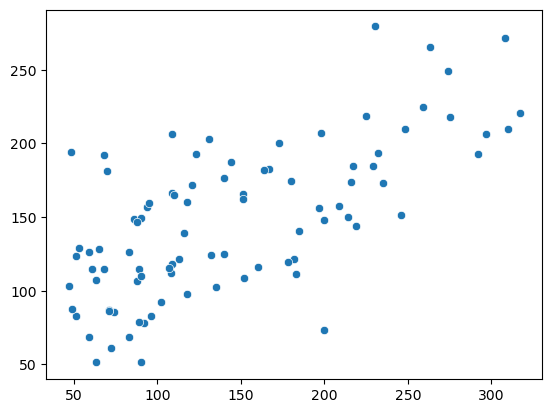

In [35]:
sns.scatterplot(x=Y_test, y=Y_pred)

<Axes: >

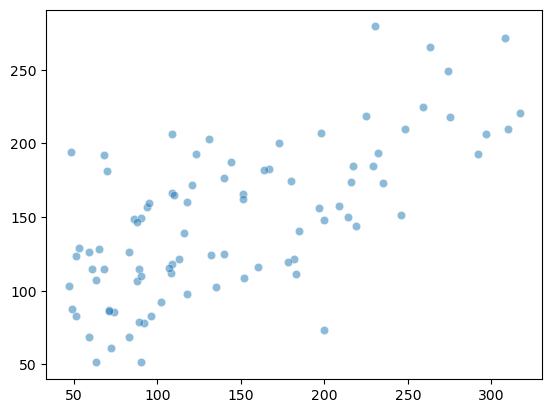

In [36]:
sns.scatterplot(x=Y_test, y=Y_pred ,alpha =0.5)